# Parse the results of the experiment

In [ ]:
# Settings

data_dir = '/Users/lixin/Desktop/results' # path to the output of `collect.py`

import shutil
import seaborn as sns
import matplotlib.pyplot as plt

usetex = shutil.which("latex") is not None

# Enable LaTeX rendering
plt.rcParams.update({
    "text.usetex": usetex,  # Use LaTeX for rendering text
    "font.size": 145,  # Global font size
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"  # Load extra LaTeX packages
})

# the order of the SUTs
sut_order = {"features-service": 0,
         "feature-services": 0,
         "genome-nexus": 1,
         "languagetool": 2,
         "market": 3,
         "person-controller": 4,
         "emb-project": 5,
         "restcountries": 6,
         "user-management": 7,
         "ncs": 8,
         "scs": 9,
         "gitlab-branch": 10,
         "gitlab-commit": 11,
         "gitlab-groups": 12,
         "gitlab-issues": 13,
         "gitlab-project": 14,
         "gitlab-repository": 15
         }
formal_sut_names = {
    "features-service": r"\emph{FeatSrv}",
    "feature-services": r"\emph{FeatSrv}",
    "genome-nexus": r"\emph{GenomeNex}",
    "languagetool": r"\emph{LangTool}",
    "market": r"\emph{MktSrv}",
    "person-controller": r"\emph{PersCtrl}",
    "emb-project": r"\emph{ProjTrack}",
    "restcountries": r"\emph{RestCtry}",
    "user-management": r"\emph{UserMgmt}",
    "ncs": r"\emph{NCS}",
    "scs": r"\emph{SCS}",
    "gitlab-branch": r"\emph{GLBranch}",
    "gitlab-commit": r"\emph{GLCommit}",
    "gitlab-groups": r"\emph{GLGroups}",
    "gitlab-issues": r"\emph{GLIssues}",
    "gitlab-project": r"\emph{GLProject}",
    "gitlab-repository": r"\emph{GLRepo}",
}
tool_order = {
    'emrest': 0,
    'arat-rl': 10,
    'morest': 30,
    'evomaster': 20,
    'schemathesis': 50,
    'miner': 60,
    'restct': 40,
    'emrest-infer': 1,      
    'emrest-random': 2,
    'emrest-noretry': 3,	
}
formal_tool_names = {
    'emrest': r'\textsc{EmRest}',
    'arat-rl': 'ARAT-RL',
    'morest': r'\textsc{Morest}',
    'evomaster': r'\textsc{EvoMaster}',
    'schemathesis': 'Schemathesis',
    'miner': 'MINER',
    'restct': r'\textsc{RestCT}',
    'emrest-infer': r'\textsc{EmRest}$_{\text{Infer}}$',
    'emrest-random': r'\textsc{EmRest}$_{\text{Random}}$',
    'emrest-noretry': r'\textsc{EmRest}$_{\text{NoRetry}}$',
    
}
# the color palette for the tools
tool_palette = {
    'emrest': sns.color_palette("Set1")[0],
    'arat-rl': sns.color_palette("Set1")[1],
    'morest': sns.color_palette("Set1")[2],
    'evomaster': sns.color_palette("Set1")[3],
    'schemathesis': sns.color_palette("Set1")[4],
    'miner': sns.color_palette("Set1")[5],
    'emrest-infer': sns.color_palette("Set1")[6],
    'emrest-random': sns.color_palette("Set1")[7],
    'restct': sns.color_palette("Set1")[8],
}

## Read the results

In [32]:
import json
import os
import pandas as pd

cb_dfs, bug_info = [], []
# read all projects
for tool_name in os.listdir(data_dir):
    tool_folder = os.path.join(data_dir, tool_name)
    if not os.path.isdir(tool_folder):
        continue
    if tool_name not in tool_order.keys():
        print(f"Tool {tool_name} not in tool_order, skip it")
    for round_name in os.listdir(tool_folder):
        if not round_name.startswith('round'):
            continue
        round_path = os.path.join(tool_folder, round_name)
        round_id = int(round_name.replace("round", ''))
        round_df = pd.read_csv(os.path.join(round_path, "coverage_and_bug.csv"))
        round_df['tool'] = tool_name
        round_df['round'] = round_id
        cb_dfs.append(round_df) # cb: coverage (operation coverage and line coverage) and bug numbers

        for file in os.listdir(round_path):
            if file.endswith('_bug.json'):
                sut_name = file.replace('_bug.json', '')
                with open(os.path.join(round_path, file), 'r') as f:
                    bug_json = json.load(f)
                    for op, bugs in bug_json.items():
                        for bug in bugs:
                            bug_info.append({'sut': sut_name, 'tool': tool_name, 'round': round_id, 'bug_id': f"{sut_name}:{op}:{bug}"})
                                
cb_df = pd.concat(cb_dfs)
cb_df = cb_df[['SUT', 'Op_20X', 'Op_All', 'Unique Bugs', 'Line Coverage', 'tool', 'round']]
cb_df.columns = ['sut', 'op_20x', 'op_all', 'unique_bugs', 'line_coverage', 'tool', 'round'] 

bug_df = pd.DataFrame(bug_info)

In [ ]:
cb_df.shape # 10 tools * 16 suts * 30 rounds = 4800

(4800, 7)

In [34]:
cb_df.columns

Index(['sut', 'op_20x', 'op_all', 'unique_bugs', 'line_coverage', 'tool',
       'round'],
      dtype='object')

In [35]:
cb_df.head()

sut  op_20x  op_all  unique_bugs  line_coverage          tool  \
0       emb-project    27.0    60.0         15.0          37.05  schemathesis   
1  features-service     4.0    18.0         14.0          34.35  schemathesis   
2      genome-nexus    22.0    23.0          0.0          26.28  schemathesis   
3      languagetool     1.0     2.0          1.0           1.92  schemathesis   
4            market     1.0    13.0          5.0           9.81  schemathesis   

   round  
0     20  
1     20  
2     20  
3     20  
4     20

In [36]:
bug_df.head()

sut          tool  round  \
0    languagetool  schemathesis     20   
1   restcountries  schemathesis     20   
2   gitlab-branch  schemathesis     20   
3  gitlab-project  schemathesis     20   
4   gitlab-commit  schemathesis     20   

                                              bug_id  
0  languagetool:post:/check:Error: Internal Error...  
1  restcountries:get:/v2/alpha:{"status":500,"mes...  
2  gitlab-branch:get:/projects:{"message":"500 In...  
3  gitlab-project:get:/projects:{"message":"500 I...  
4  gitlab-commit:get:/projects:{"message":"500 In...

In [37]:
bug_df['round'].unique()

array([20, 18, 27, 11, 29, 16, 28, 17, 10, 19, 26, 21,  4,  3,  2,  5, 24,
       23, 15, 12, 13, 14, 22, 25,  7,  9,  8,  6,  1, 30])

## Check the number of rounds for each sut and each tool 

In [38]:
for tool in cb_df['tool'].unique():
    print(f"The number of rounds for tool: {tool}")
    for sut in cb_df['sut'].unique():
        number = cb_df[(cb_df['tool'] == tool) & (cb_df['sut'] == sut)].shape[0]
        print(f"    {sut}: {number}")

The number of rounds for tool: schemathesis
    emb-project: 30
    features-service: 30
    genome-nexus: 30
    languagetool: 30
    market: 30
    ncs: 30
    person-controller: 30
    restcountries: 30
    scs: 30
    user-management: 30
    gitlab-branch: 30
    gitlab-commit: 30
    gitlab-groups: 30
    gitlab-issues: 30
    gitlab-project: 30
    gitlab-repository: 30
The number of rounds for tool: emrest-random
    emb-project: 30
    features-service: 30
    genome-nexus: 30
    languagetool: 30
    market: 30
    ncs: 30
    person-controller: 30
    restcountries: 30
    scs: 30
    user-management: 30
    gitlab-branch: 30
    gitlab-commit: 30
    gitlab-groups: 30
    gitlab-issues: 30
    gitlab-project: 30
    gitlab-repository: 30
The number of rounds for tool: restct
    emb-project: 30
    features-service: 30
    genome-nexus: 30
    languagetool: 30
    market: 30
    ncs: 30
    person-controller: 30
    restcountries: 30
    scs: 30
    user-management: 30
    g

## RQ1

### Operation Coverage In Table

In [39]:
selected_tools = [
    'emrest',
    'arat-rl',
    'morest',
    'restct',
    'miner',
    'evomaster',
    'schemathesis',
    'emrest-infer',
]
rq1_df = cb_df[cb_df['tool'].isin(selected_tools)]
rq1_df.tool.unique()

array(['schemathesis', 'restct', 'morest', 'evomaster', 'arat-rl',
       'emrest', 'emrest-infer', 'miner'], dtype=object)

In [40]:
# get the mean and std of the operation coverage and code coverage
rq1_avg_df = rq1_df.groupby(['tool', 'sut']).agg({'op_20x': ['mean', 'std'],
                                              'line_coverage': ['mean', 'std']}).reset_index()

In [41]:
# multi-level column index to single level column index
rq1_avg_df.columns = [' '.join(col).strip() for col in rq1_avg_df.columns.values]
rq1_avg_df.head()

tool               sut  op_20x mean  op_20x std  line_coverage mean  \
0  arat-rl       emb-project    42.266667    1.740657           40.054000   
1  arat-rl  features-service    17.566667    1.222866           78.454333   
2  arat-rl      genome-nexus    22.966667    0.182574           30.542000   
3  arat-rl     gitlab-branch     6.966667    0.808717            1.304333   
4  arat-rl     gitlab-commit     3.000000    0.000000            1.271333   

   line_coverage std  
0           0.387508  
1           5.533811  
2           2.538254  
3           0.039364  
4           0.055692

### Operation Coverage In Bar Plot

In [42]:
import matplotlib.ticker as mticker

fig, axs = plt.subplots(2, 8, figsize=(200, 60), sharex=True)  # Independent y-axis

sorted_sut = sorted(rq1_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq1_df.groupby('sut')):
    # assert group.shape[0] / rq1_df.tool.nunique() == 30, f"Missing rounds for {sut}: {group.shape[0]}"
    ax = axs[sorted_sut.index(sut)//8, sorted_sut.index(sut)%8]
    sns.barplot(
        data=group, 
        y='op_20x', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    ax.set_ylim(bottom=0)
    # y-axis integer only
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq1_op_cov.pdf', bbox_inches='tight')

### Code Coverage In Bar Plot

In [43]:
fig, axs = plt.subplots(2, 8, figsize=(200, 60), sharex=True)  # Independent y-axis
legend = None
sorted_sut = sorted(rq1_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq1_df.groupby('sut')):
    # assert group.shape[0] / rq1_df.tool.nunique() == 30, f"Missing rounds for {sut}: {group.shape[0]}"
    ax = axs[sorted_sut.index(sut)//8, sorted_sut.index(sut)%8]
    sns.barplot(
        data=group, 
        y='line_coverage', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    if sut.startswith('gitlab'):
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.1f}\%" if x > 0 else ""))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:.0f}\%" if x > 0 else ""))



handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq1_code_cov.pdf', bbox_inches='tight')

## RQ2: Bug Dection

In [44]:
selected_tools = [
    'emrest',
    'arat-rl',
    'morest',
    'restct',
    'miner',
    'evomaster',
    'schemathesis',
    'emrest-infer',
]
rq2_df = bug_df[bug_df['tool'].isin(selected_tools)]
rq2_df = rq2_df.groupby(['tool', 'sut', 'round']).nunique().reset_index()
rq2_df.columns = ['tool', 'sut', 'round', 'unique_bug']
rq2_df.head()

tool          sut  round  unique_bug
0  arat-rl  emb-project      1          15
1  arat-rl  emb-project      2          16
2  arat-rl  emb-project      3          15
3  arat-rl  emb-project      4          15
4  arat-rl  emb-project      5          15

In [45]:
# each sut tool pair has 30 rounds, if not, fill the missing rounds with 0
for tool in rq2_df['tool'].unique():
    for sut in rq2_df['sut'].unique():
        for r in range(1, 31):
            if ((rq2_df['tool'] == tool) & (rq2_df['sut'] == sut) & (rq2_df['round'] == r)).any():
                continue
            else:
                new_row = {'tool': tool, 'sut': sut, 'round': r, 'unique_bug': 0}
                rq2_df = pd.concat([rq2_df, pd.DataFrame([new_row])], ignore_index=True)
                print(f"Missing round {r} for {sut} and {tool}")

Missing round 1 for gitlab-branch and arat-rl
Missing round 2 for gitlab-branch and arat-rl
Missing round 3 for gitlab-branch and arat-rl
Missing round 5 for gitlab-branch and arat-rl
Missing round 7 for gitlab-branch and arat-rl
Missing round 8 for gitlab-branch and arat-rl
Missing round 9 for gitlab-branch and arat-rl
Missing round 10 for gitlab-branch and arat-rl
Missing round 11 for gitlab-branch and arat-rl
Missing round 12 for gitlab-branch and arat-rl
Missing round 13 for gitlab-branch and arat-rl
Missing round 14 for gitlab-branch and arat-rl
Missing round 15 for gitlab-branch and arat-rl
Missing round 16 for gitlab-branch and arat-rl
Missing round 17 for gitlab-branch and arat-rl
Missing round 18 for gitlab-branch and arat-rl
Missing round 19 for gitlab-branch and arat-rl
Missing round 20 for gitlab-branch and arat-rl
Missing round 21 for gitlab-branch and arat-rl
Missing round 22 for gitlab-branch and arat-rl
Missing round 23 for gitlab-branch and arat-rl
Missing round 24 for

In [46]:
cols = int(len(rq2_df.sut.unique()) / 2)

fig, axs = plt.subplots(2, cols, figsize=(190, 60), sharex=True)  # Independent y-axis

sorted_sut = sorted(rq2_df['sut'].unique(), key=lambda x: sut_order[x])
for i, (sut, group) in enumerate(rq2_df.groupby('sut')):
    ax = axs[sorted_sut.index(sut)//cols, sorted_sut.index(sut)%cols]
    sns.barplot(
        data=group, 
        y='unique_bug', 
        ax=ax, 
        alpha=0.6, 
        hue='tool', 
        palette=tool_palette,
        hue_order=sorted([t for t in group['tool'].unique()], key=lambda x: tool_order[x]),
        errorbar='sd'
        )  
    ax.set_title(f"{formal_sut_names[sut]}", fontsize=120, pad=40)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.legend().remove()
    ax.set_ylim(bottom=0)

handles, labels = axs[0, 0].get_legend_handles_labels()
# check whether the legend is the same for all subplots
for i in range(len(axs)):
    assert labels == axs[i//8, i%8].get_legend_handles_labels()[1], "The legend is not the same for all subplots"

# Add a big legend at the top
fig.legend(
    handles,
    [formal_tool_names[l] for l in labels],
    loc='upper center',
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.05)
)

# Adjust layout to prevent shrinking
# plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.savefig('rq2_bug.pdf', bbox_inches='tight')

### Updset Plotting

In [47]:
selected_tools = [
    'emrest',
    'arat-rl',
    'morest',
    'restct',
    'miner',
    'evomaster',
    'schemathesis',
    'emrest-infer',
]
all_bug = bug_df[bug_df['tool'].isin(selected_tools)]
# group by tool and sut to get the unique bugs themselves, not the number of bugs
all_bug = all_bug.drop_duplicates(subset=['sut', 'tool', 'bug_id']).reset_index()
all_bug.head()

index             sut          tool  round  \
0      0    languagetool  schemathesis     20   
1      1   restcountries  schemathesis     20   
2      2   gitlab-branch  schemathesis     20   
3      3  gitlab-project  schemathesis     20   
4      4   gitlab-commit  schemathesis     20   

                                              bug_id  
0  languagetool:post:/check:Error: Internal Error...  
1  restcountries:get:/v2/alpha:{"status":500,"mes...  
2  gitlab-branch:get:/projects:{"message":"500 In...  
3  gitlab-project:get:/projects:{"message":"500 I...  
4  gitlab-commit:get:/projects:{"message":"500 In...

/Users/lixin/miniconda3/envs/exp/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/lixin/miniconda3/envs/exp/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

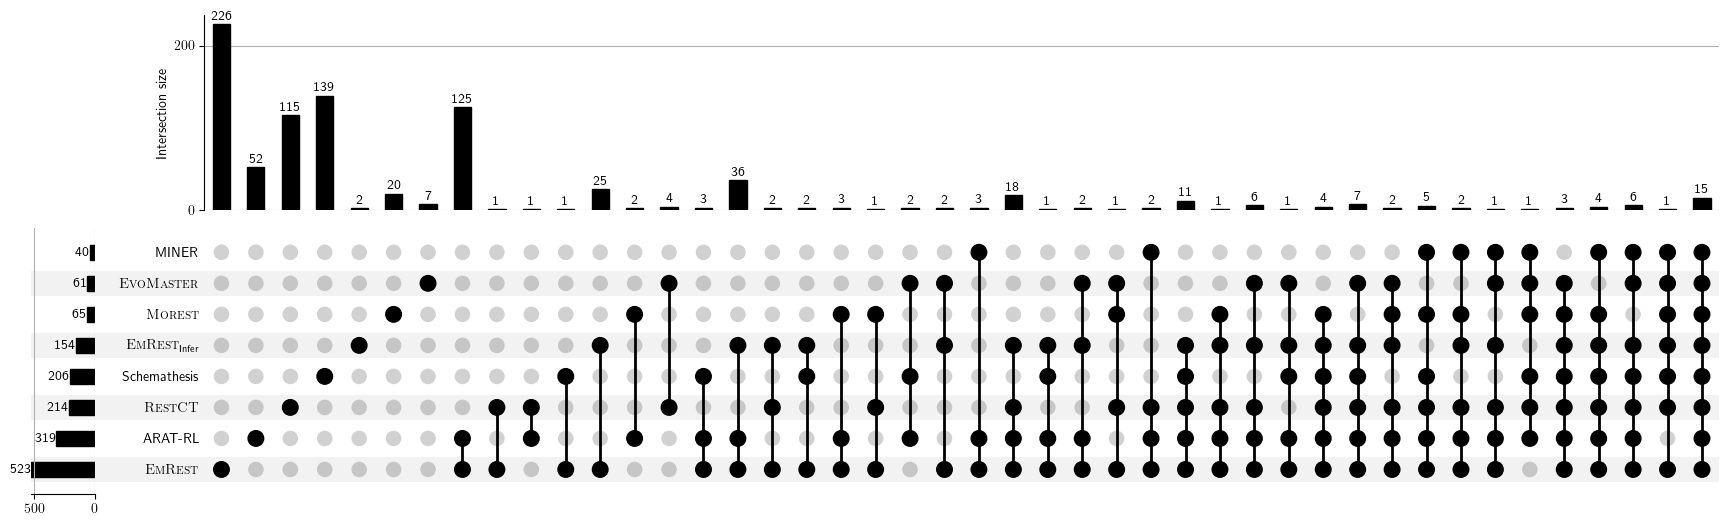

In [48]:
# plot the upsets of the unique bugs
from upsetplot import UpSet, from_indicators

bug_list = all_bug.groupby('tool')['bug_id'].apply(set).to_dict()
# all unque bug ids
all_bug_ids = set()
for bug_ids in bug_list.values():
    # all_bug_ids.update({i for i in bug_ids if "========RESPONSE========" not in i})
    all_bug_ids.update(bug_ids)
all_bug_ids = sorted(all_bug_ids)
# construct member matrix
data = {}
for tool, bug_ids in bug_list.items():
    data[formal_tool_names[tool]] = [bug in bug_ids for bug in all_bug_ids]
membership_series = from_indicators(data)

# plot the upset
upset = UpSet(
    membership_series, 
    subset_size='count', 
    show_counts=True,
    )
    
with plt.rc_context({'font.size': 10}):
    upset.plot()
plt.savefig('rq2_upset.pdf', bbox_inches='tight')

In [49]:
for tool, series in data.items():
    print(f"{tool}: {sum(series)}")

ARAT-RL: 319
\textsc{EmRest}: 523
\textsc{EmRest}$_{\text{Infer}}$: 154
\textsc{EvoMaster}: 61
MINER: 40
\textsc{Morest}: 65
\textsc{RestCT}: 214
Schemathesis: 206


## RQ3: Ablation Experiments

In [50]:
selected_tools = [
    'emrest',
    'emrest-random',
    'emrest-noretry',
]
rq3_df = cb_df[['tool', 'sut', 'round', 'op_20x', 'unique_bugs', 'line_coverage']]
rq3_df = rq3_df[rq3_df['tool'].isin(selected_tools)]

In [51]:
rq3_df.shape # 3 tools * 16 suts * 30 rounds = 1440

(1440, 6)

In [52]:
rq3_avg_df = rq3_df.groupby(['tool', 'sut']).agg({'op_20x': ['mean', 'std'], 
                                                        'unique_bugs': ['mean', 'std'],
                                                        'line_coverage': ['mean', 'std']}).reset_index()
rq3_avg_df.columns = ['tool', 'sut', 'op_20x mean', 'op_20x std', 'unique_bug mean', 'unique_bug std', 'line_coverage mean', 'line_coverage std']
rq3_avg_df

tool                sut  op_20x mean  op_20x std  \
0           emrest        emb-project    45.366667    0.889918   
1           emrest   features-service    17.866667    0.345746   
2           emrest       genome-nexus    22.633333    0.490133   
3           emrest      gitlab-branch     9.000000    0.000000   
4           emrest      gitlab-commit     5.600000    2.313379   
5           emrest      gitlab-groups    14.533333    3.821295   
6           emrest      gitlab-issues    24.566667    3.793673   
7           emrest     gitlab-project    24.433333    0.858360   
8           emrest  gitlab-repository     4.366667    0.808717   
9           emrest       languagetool     2.000000    0.000000   
10          emrest             market     1.000000    0.000000   
11          emrest                ncs     6.000000    0.000000   
12          emrest  person-controller     8.000000    0.000000   
13          emrest      restcountries    22.000000    0.000000   
14          emrest                scs    11.000000    0.000000   
15          emrest    user-management    14.766667    0.430183   
16  emrest-noretry        emb-project    43.600000    1.248447   
17  emrest-noretry   features-service    18.000000    0.000000   
18  emrest-noretry       genome-nexus    22.500000    0.572351   
19  emrest-noretry      gitlab-branch     4.700000    2.493440   
20  emrest-noretry      gitlab-commit     2.600000    1.693802   
21  emrest-noretry      gitlab-groups     4.900000    5.646787   
22  emrest-noretry      gitlab-issues     8.833333    8.534245   
23  emrest-noretry     gitlab-project    13.733333   10.474710   
24  emrest-noretry  gitlab-repository     1.800000    1.270352   
25  emrest-noretry       languagetool     2.000000    0.000000   
26  emrest-noretry             market     1.000000    0.000000   
27  emrest-noretry                ncs     6.000000    0.000000   
28  emrest-noretry  person-controller     8.000000    0.000000   
29  emrest-noretry      restcountries    22.000000    0.000000   
30  emrest-noretry                scs    11.000000    0.000000   
31  emrest-noretry    user-management    13.566667    0.504007   
32   emrest-random        emb-project    42.866667    1.736690   
33   emrest-random   features-service    17.900000    0.305129   
34   emrest-random       genome-nexus    22.700000    0.595963   
35   emrest-random      gitlab-branch     7.566667    1.406471   
36   emrest-random      gitlab-commit     5.300000    2.019730   
37   emrest-random      gitlab-groups     5.100000    3.584930   
38   emrest-random      gitlab-issues    19.566667    7.393769   
39   emrest-random     gitlab-project    18.800000    3.726883   
40   emrest-random  gitlab-repository     3.866667    1.136642   
41   emrest-random       languagetool     2.000000    0.000000   
42   emrest-random             market     1.000000    0.000000   
43   emrest-random                ncs     6.000000    0.000000   
44   emrest-random  person-controller     7.500000    0.731083   
45   emrest-random      restcountries    21.866667    0.571346   
46   emrest-random                scs    11.000000    0.000000   
47   emrest-random    user-management    14.800000    0.406838   

    unique_bug mean  unique_bug std  line_coverage mean  line_coverage std  
0         15.033333        0.889918           39.253667           0.262107  
1         29.066667        0.907187           77.323667           1.415070  
2          0.066667        0.253708           32.212000           1.029568  
3          0.000000        0.000000            1.149667           0.025795  
4          1.900000        0.884736            1.214000           0.095938  
5          5.500000        1.548080            1.417667           0.085930  
6         16.400000        3.672827            2.649000           0.109618  
7          3.666667        0.922266            2.731000           0.056468  
8          0.633333        0.614948            0.934000           0.150599  
9        

In [53]:
# mean value \pm std value (rank)
rq3_avg_df['op_20x'] = '$' + rq3_avg_df['op_20x mean'].round(1).astype(str) + " \pm " + rq3_avg_df['op_20x std'].round(1).astype(str) + "$"
rq3_avg_df['unique_bug'] = '$' + rq3_avg_df['unique_bug mean'].round(1).astype(str) + " \pm " + rq3_avg_df['unique_bug std'].round(1).astype(str) +  "$"
rq3_avg_df['line_coverage'] = '$' + rq3_avg_df['line_coverage mean'].round(1).astype(str) + "\% \pm " + rq3_avg_df['line_coverage std'].round(1).astype(str)  + "$"

rq3_avg_df = rq3_avg_df.pivot(index='sut', columns=['tool'], values=['op_20x', 'line_coverage', 'unique_bug']).sort_values(by=['sut'], key=lambda x: x.map(sut_order))
rq3_avg_df.columns = rq3_avg_df.columns.map(lambda x: (x[0], f"{formal_tool_names[x[1]]}"))
rq3_avg_df.index = rq3_avg_df.index.map(lambda x: formal_sut_names[x])
rq3_avg_df

op_20x                                     \
tool             \textsc{EmRest} \textsc{EmRest}$_{\text{NoRetry}}$   
sut                                                                   
\emph{FeatSrv}    $17.9 \pm 0.3$                     $18.0 \pm 0.0$   
\emph{GenomeNex}  $22.6 \pm 0.5$                     $22.5 \pm 0.6$   
\emph{LangTool}    $2.0 \pm 0.0$                      $2.0 \pm 0.0$   
\emph{MktSrv}      $1.0 \pm 0.0$                      $1.0 \pm 0.0$   
\emph{PersCtrl}    $8.0 \pm 0.0$                      $8.0 \pm 0.0$   
\emph{ProjTrack}  $45.4 \pm 0.9$                     $43.6 \pm 1.2$   
\emph{RestCtry}   $22.0 \pm 0.0$                     $22.0 \pm 0.0$   
\emph{UserMgmt}   $14.8 \pm 0.4$                     $13.6 \pm 0.5$   
\emph{NCS}         $6.0 \pm 0.0$                      $6.0 \pm 0.0$   
\emph{SCS}        $11.0 \pm 0.0$                     $11.0 \pm 0.0$   
\emph{GLBranch}    $9.0 \pm 0.0$                      $4.7 \pm 2.5$   
\emph{GLCommit}    $5.6 \pm 2.3$                      $2.6 \pm 1.7$   
\emph{GLGroups}   $14.5 \pm 3.8$                      $4.9 \pm 5.6$   
\emph{GLIssues}   $24.6 \pm 3.8$                      $8.8 \pm 8.5$   
\emph{GLProject}  $24.4 \pm 0.9$                    $13.7 \pm 10.5$   
\emph{GLRepo}      $4.4 \pm 0.8$                      $1.8 \pm 1.3$   

                                                       line_coverage  \
tool             \textsc{EmRest}$_{\text{Random}}$   \textsc{EmRest}   
sut                                                                    
\emph{FeatSrv}                      $17.9 \pm 0.3$  $77.3\% \pm 1.4$   
\emph{GenomeNex}                    $22.7 \pm 0.6$  $32.2\% \pm 1.0$   
\emph{LangTool}                      $2.0 \pm 0.0$  $22.1\% \pm 4.7$   
\emph{MktSrv}                        $1.0 \pm 0.0$  $11.9\% \pm 0.0$   
\emph{PersCtrl}                      $7.5 \pm 0.7$  $74.0\% \pm 0.0$   
\emph{ProjTrack}                    $42.9 \pm 1.7$  $39.3\% \pm 0.3$   
\emph{RestCtry}                     $21.9 \pm 0.6$  $77.5\% \pm 0.0$   
\emph{UserMgmt}                     $14.8 \pm 0.4$  $87.4\% \pm 1.6$   
\emph{NCS}                           $6.0 \pm 0.0$  $92.9\% \pm 0.6$   
\emph{SCS}                          $11.0 \pm 0.0$  $65.3\% \pm 1.1$   
\emph{GLBranch}                      $7.6 \pm 1.4$   $1.1\% \pm 0.0$   
\emph{GLCommit}                      $5.3 \pm 2.0$   $1.2\% \pm 0.1$   
\emph{GLGroups}                      $5.1 \pm 3.6$   $1.4\% \pm 0.1$   
\emph{GLIssues}                     $19.6 \pm 7.4$   $2.6\% \pm 0.1$   
\emph{GLProject}                    $18.8 \pm 3.7$   $2.7\% \pm 0.1$   
\emph{GLRepo}                        $3.9 \pm 1.1$   $0.9\% \pm 0.2$   

                                                     \
tool             \textsc{EmRest}$_{\text{NoRetry}}$   
sut                                                   
\emph{FeatSrv}                     $77.6\% \pm 0.8$   
\emph{GenomeNex}                   $31.0\% \pm 1.3$   
\emph{LangTool}                    $23.6\% \pm 4.5$   
\emph{MktSrv}                      $12.1\% \pm 0.9$   
\emph{PersCtrl}                    $74.0\% \pm 0.0$   
\emph{ProjTrack}                   $39.0\% \pm 0.4$   
\emph{RestCtry}                    $77.5\% \pm 0.0$   
\emph{UserMgmt}                    $80.5\% \pm 3.1$   
\emph{NCS}                         $92.8\% \pm 0.2$   
\emph{SCS}                         $65.2\% \pm 1.0$   
\emph{GLBranch}                     $0.9\% \pm 0.2$   
\emph{GLCommit}                     $0.9\% \pm 0.2$   
\emph{GLGroups}                     $1.2\% \pm 0.1$   
\emph{GLIssues}                     $2.2\% \pm 0.3$   
\emph{GLProject}                    $2.2\% \pm 0.5$   
\emph{GLRepo}                       $0.6\% \pm 0.1$   

                                                          unique_bug  \
tool             \textsc{EmRest}$_{\text{Random}}$   \textsc{EmRest}   
sut                                                                    
\emph{FeatSrv}                    $77.6\% \pm

In [54]:
rq3_avg_df.to_latex('rq3.tex')

## Find operations that can only be covered by EmRest

In [55]:
# it takes a long time to read the data
from tqdm.notebook import tqdm

req_dfs = []
for tool_name in tqdm(os.listdir(data_dir), desc='tool', leave=False):
    tool_folder = os.path.join(data_dir, tool_name)
    if not os.path.isdir(tool_folder):
        continue
    if tool_name not in tool_order.keys():
        print(f"Tool {tool_name} not in tool_order, skip it")
    for round_name in tqdm(os.listdir(tool_folder), desc='round', leave=False):
        if not round_name.startswith('round'):
            continue
        round_path = os.path.join(tool_folder, round_name)
        round_id = int(round_name.replace("round", ''))
        req_df = pd.read_csv(os.path.join(round_path, "request_info.csv"))
        req_df['tool'] = tool_name
        req_df['round'] = round_id
        req_dfs.append(req_df) 
req_df = pd.concat(req_dfs)

tool:   0%|          | 0/11 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/31 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

round:   0%|          | 0/30 [00:00<?, ?it/s]

In [56]:
# release the memory
req_dfs = []
req_df['status_group'] = req_df['status_group'].astype('category')
req_df['tool'] = req_df['tool'].astype('category')
req_df['sut'] = req_df['sut'].astype('category')
req_df['round'] = req_df['round'].astype('category')

In [57]:
req_df = req_df[req_df['status_group'] == '20X']
req_df = req_df.drop_duplicates(subset=['tool', 'sut', 'round', 'op'])

In [58]:
ops_only_covered_by_emrest = {s: [] for s in req_df['sut'].unique()}
ops_not_covered_by_emrest = {s: set() for s in req_df['sut'].unique()}
emrest_ops = {s: set(req_df[(req_df['tool'] == 'emrest') & (req_df['sut'] == s)]['op'].unique()) for s in req_df['sut'].unique()}
for tool in req_df.tool.unique():
    if tool.startswith('emrest'):
        continue
    for sut in req_df.sut.unique():
        tool_ops = set(req_df[(req_df['tool'] == tool) & (req_df['sut'] == sut)]['op'].unique())
        emrest_op = emrest_ops[sut]
        ops_only_covered_by_emrest[sut].append(set(emrest_op - tool_ops))
        ops_not_covered_by_emrest[sut].update(tool_ops - emrest_op)

ops_only_covered_by_emrest = {s: set.intersection(*ops_only_covered_by_emrest[s]) for s in ops_only_covered_by_emrest}

In [59]:
print("Operations only covered by EmRest:")
for sut, ops in ops_only_covered_by_emrest.items():
    if len(ops) == 0:
        continue
    print(f"{formal_sut_names[sut]}: {len(ops)}")
    for op in ops:
        print(f"    {op}")

Operations only covered by EmRest:
\emph{UserMgmt}: 3
    post:/users/register
    put:/users/{id}
    post:/users
\emph{ProjTrack}: 1
    post:/app/api/authenticate
\emph{GLCommit}: 10
    post:/projects/{id}/repository/commits/{sha}/revert
    get:/projects/{id}/repository/commits/{sha}/statuses
    get:/projects/{id}/repository/commits/{sha}/diff
    get:/projects/{id}/repository/commits/{sha}/comments
    post:/projects/{id}/statuses/{sha}
    get:/projects/{id}/repository/commits/{sha}
    post:/projects/{id}/repository/commits/{sha}/cherry_pick
    get:/projects/{id}/repository/commits/{sha}/merge_requests
    get:/projects/{id}/repository/commits/{sha}/refs
    get:/projects/{id}/repository/commits/{sha}/discussions
\emph{GLGroups}: 1
    delete:/groups/{id}/share/{group_id}


In [60]:
print("Operations not covered by EmRest:")
for sut, ops in ops_not_covered_by_emrest.items():
    if len(ops) == 0:
        continue
    print(f"{formal_sut_names[sut]}: {len(ops)}")
    for op in ops:
        print(f"    {op}")

Operations not covered by EmRest:
\emph{ProjTrack}: 3
    delete:/app/api/employees
    delete:/app/api/assignments/{employeeId}/{projectId}/{commitDate}
    get:/app/api/assignments/{employeeId}/{projectId}/{commitDate}
\emph{GLProject}: 1
    put:/projects/{id}
